<h3>引入</h4>

In [76]:
import numpy as np
import scipy.io
import tensorflow as tf
import matplotlib.pyplot as plt

<h3>生成RGB图像(UAV论文)</h3>
<h5 style = "color: yellow">数据引入</h5>

In [77]:
data = scipy.io.loadmat('dataset.mat')
channelA_data = data['echoes']['channelA']  # 形状为 (150, 6000)
channelB_data = data['echoes']['channelB']  # 形状为 (150, 6000)
dataset = np.hstack((channelA_data, channelB_data)).T
dataset = dataset[0][0]
dataset

array([[-0.01367188-0.23510742j, -0.01391602-0.23364258j,
        -0.01391602-0.23535156j, ..., -0.02392578-0.24047852j,
        -0.02416992-0.2409668j , -0.02490234-0.24169922j],
       [-0.01074219-0.24438477j, -0.01025391-0.2434082j ,
        -0.01171875-0.24511719j, ..., -0.02416992-0.24951172j,
        -0.02441406-0.2487793j , -0.02514648-0.2487793j ],
       [-0.01806641-0.23046875j, -0.01806641-0.22851562j,
        -0.01928711-0.23022461j, ..., -0.02880859-0.23730469j,
        -0.02978516-0.23681641j, -0.02929688-0.23706055j],
       ...,
       [-0.02050781-0.21948242j, -0.01928711-0.22045898j,
        -0.01831055-0.22094727j, ..., -0.01635742-0.23022461j,
        -0.01660156-0.22998047j, -0.01831055-0.23071289j],
       [-0.03149414-0.22631836j, -0.03125   -0.2277832j ,
        -0.03100586-0.22851562j, ..., -0.03271484-0.23657227j,
        -0.03271484-0.23730469j, -0.03466797-0.23754883j],
       [-0.02441406-0.21948242j, -0.02416992-0.22119141j,
        -0.02490234-0.22119141

<h5 style = "color: yellow">实部和虚部</h5>

In [78]:
# 定义复数到实数的转换函数
def complex_to_real(complex_data):

    # 将复数转换为实部和虚部
    real_part = np.real(complex_data)
    imag_part = np.imag(complex_data)

 
    # 将实部和虚部堆叠成新的数组
    real_imag_stack = np.stack([real_part, imag_part], axis=-1)

    return real_part, imag_part, real_imag_stack

<h5 style = "color: yellow">数据融合</h5>

In [79]:
# 数据融合函数
def data_fusion(radar_raw):

    # 将雷达原始信号、RD谱图和TF谱图转换为实数表示
    rd_spectrum, tf_spectrum, radar_raw_real = complex_to_real(radar_raw)
    real, imag, rd_spectrum_real = complex_to_real(rd_spectrum)
    real, imag, tf_spectrum_real = complex_to_real(tf_spectrum)

    # 归一化处理
    radar_raw_norm = radar_raw_real / np.max(np.abs(radar_raw_real))
    rd_spectrum_norm = rd_spectrum_real / np.max(np.abs(rd_spectrum_real))
    tf_spectrum_norm = tf_spectrum_real / np.max(np.abs(tf_spectrum_real))

    # 调整尺寸到227x227
    radar_raw_resized = tf.image.resize(radar_raw_norm, (227, 227))
    rd_spectrum_resized = tf.image.resize(rd_spectrum_norm, (227, 227))
    tf_spectrum_resized = tf.image.resize(tf_spectrum_norm, (227, 227))

    # 合成到RGB三个通道
    fused_image = tf.concat([radar_raw_resized, rd_spectrum_resized, tf_spectrum_resized], axis=-1)
    print(radar_raw_resized.shape, rd_spectrum_resized.shape, tf_spectrum_resized.shape)

    return fused_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9895283..0.3569488].


(227, 227, 2) (227, 227, 2) (227, 227, 2)


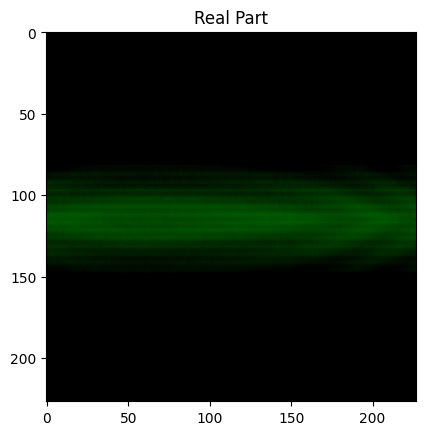

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9890024..0.3569488].


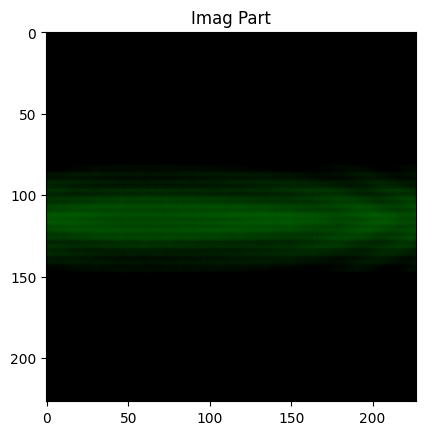

In [80]:
# 将复数转换为实部和虚部
real_part = np.real(dataset)
imag_part = np.imag(dataset)
fused_data = data_fusion(dataset)

# 分离实部和虚部通道
real_channels = fused_data[:, :, :3]
imag_channels = fused_data[:, :, 3:]

# 显示实部图像
plt.imshow(real_channels)
plt.title("Real Part")
plt.show()

# 显示虚部图像
plt.imshow(imag_channels)
plt.title("Imag Part")
plt.show()